In [51]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import pickle
import scipy as spicy
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
path = '/home/diya/Documents/rat-fes/data/filipe_data/N6'

In [53]:
filenames = os.listdir(path)
print(filenames)

['N6_171211_No Obstacles_s.mat', 'N6_171026_No Obstacles_s.mat', 'N6_171204_No Obstacles_s.mat']


In [54]:
temp_datasets = []
temp_var_names = []

for file in filenames:
    temp_datasets.append(path+'/'+file)
    temp_var_names.append(file.split('_')[0]+file.split('_')[1])

datasets = sorted(temp_datasets)
var_names = sorted(temp_var_names)

In [55]:
cort_dict = {}
for i in range(len(datasets)):
    cort_dict[var_names[i]] = CortProcessor(datasets[i])

this is filipe data i belive
this is filipe data i belive
this is filipe data i belive


In [56]:
cca_dict = {}
for i in range(1, len(var_names)):
    print(var_names[0], var_names[i])
    cca_dict[var_names[i]] = CCAProcessor(cort_dict[var_names[0]], cort_dict[var_names[i]])


N6171026 N6171204
should be good to align
(7397, 28)
(7397, 5)
(7397, 21)
(7397, 5)
N6171026 N6171211
should be good to align
(8645, 28)
(8645, 5)
(8645, 27)
(8645, 5)


In [57]:
proc_vaf_scores = []
proc_y_list = []

temp = np.average(cca_dict[var_names[1]].data['cp1']['proc_vaf'], 1)
proc_vaf_scores.append(temp)

temp = cca_dict[var_names[1]].data['cp1']['proc_y']
proc_y_list.append(temp)

for i in range(1, len(var_names)):
    temp = np.average(cca_dict[var_names[i]].data['cp2']['proc_vaf'],1)
    proc_vaf_scores.append(temp)
    
    temp = cca_dict[var_names[i]].data['cp2']['proc_y']
    proc_y_list.append(temp)
        
    temp = cca_dict[var_names[1]].data['cp1']['proc_y'].shape[0]
    if proc_y_list[0].shape[0] > temp:
        proc_y_list[0] = temp
#proc_vaf_scores.append(cca_dict[var_names[0]].cp1.vaf

[Text(0, 3, '0.473698'), Text(0, 3, '0.667324'), Text(0, 3, '0.67876')]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
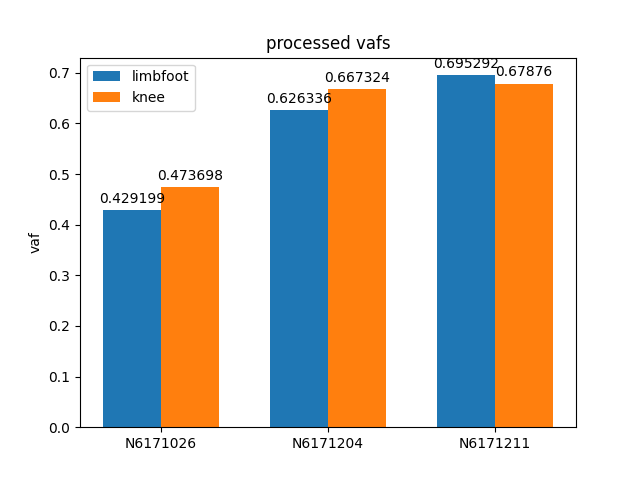

In [58]:
limbfoot_proc_vaf_scores = []
knee_proc_vaf_scores = []
for score in proc_vaf_scores:
    limbfoot_proc_vaf_scores.append(score[1])
    knee_proc_vaf_scores.append(score[3])

x = np.arange(len(var_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, limbfoot_proc_vaf_scores, width, label='limbfoot')
rects2 = ax.bar(x + width/2, knee_proc_vaf_scores, width, label='knee')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('vaf')
ax.set_title('processed vafs')
ax.set_xticks(x)
ax.set_xticklabels(var_names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


In [71]:
lowest_num_dimensions = 33


for i in range(1, len(var_names)):
    temp, nada, nada = cca_dict[var_names[i]].PCA_to_same_dimensions()
    lowest_num_dimensions = min(lowest_num_dimensions, temp)
    if temp==lowest_num_dimensions:
        low_dim = var_names[i]
    
print(str(low_dim) + ': ' + str(lowest_num_dimensions))

N6171204: 8


In [60]:
lowest_num_dimensions=33
for i in range(0, len(var_names)):
    temp = cort_dict[var_names[i]].data['rates'][0].shape[1]
    lowest_num_dimensions = min(lowest_num_dimensions, temp)
    if temp==lowest_num_dimensions:
        low_dim = var_names[i]
print(str(low_dim) + ': ' + str(lowest_num_dimensions))

N6171204: 21


In [61]:
pca_x_list = []

for i in range(1, len(var_names)):
    nada, nada, temp_x = cca_dict[var_names[i]].PCA_to_same_dimensions(preset_num_components = lowest_num_dimensions)
    pca_x_list.append(temp_x)
    
nada, temp_x, nada = cca_dict[var_names[1]].PCA_to_same_dimensions(preset_num_components = lowest_num_dimensions)
pca_x_list.insert(0, temp_x)

In [62]:
pca_h_matrices = []
pca_vaf_list = []
proc_y_list_format = []
pca_x_list_format = []
for i in range(len(pca_x_list)):
    print(pca_x_list[i].shape, proc_y_list[i].shape)
    temp_x, temp_y = format_data(pca_x_list[i], proc_y_list[i])
    pca_x_list_format.append(temp_x)
    proc_y_list_format.append(temp_y)
    
    temp_h, temp_vaf, nada, nada = decode_kfolds(temp_x, temp_y)
    pca_h_matrices.append(temp_h)
    pca_vaf_list.append(np.round((np.average(temp_vaf,1)), 2))
    
    

(7397, 21) (7397, 5)
(7397, 21) (7397, 5)
(8645, 21) (8645, 5)


[Text(0, 3, '0.47'), Text(0, 3, '0.67'), Text(0, 3, '0.68')]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
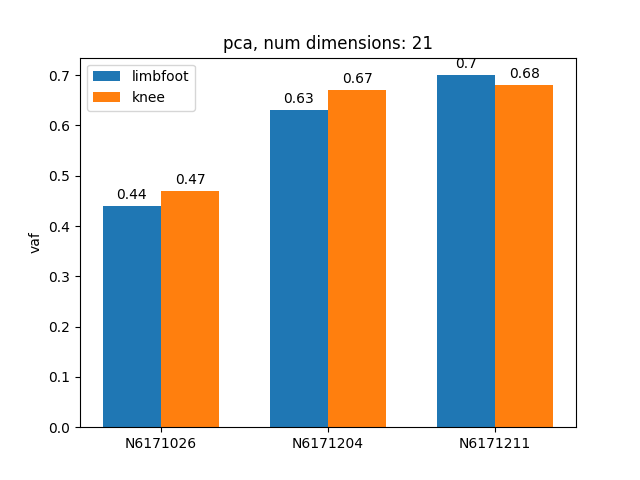

In [63]:
limbfoot_pca_vaf_scores = []
knee_pca_vaf_scores = []
for score in pca_vaf_list:
    limbfoot_pca_vaf_scores.append(score[1])
    knee_pca_vaf_scores.append(score[3])

x = np.arange(len(var_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, limbfoot_pca_vaf_scores, width, label='limbfoot')
rects2 = ax.bar(x + width/2, knee_pca_vaf_scores, width, label='knee')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('vaf')
ax.set_title('pca, num dimensions: ' + str(lowest_num_dimensions))
ax.set_xticks(x)
ax.set_xticklabels(var_names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

In [64]:
fixed_decoder = pca_h_matrices[0]
fixed_decoder_vaf_list = []
for i in range(len(pca_x_list_format)):
    nada, temp_vaf, nada, nada, = decode_kfolds(pca_x_list_format[i], proc_y_list_format[i], preset_h = fixed_decoder)
    fixed_decoder_vaf_list.append(np.round((np.average(temp_vaf, 1)), 2))

[Text(0, 3, '0.52'), Text(0, 3, '0.23'), Text(0, 3, '0.23')]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
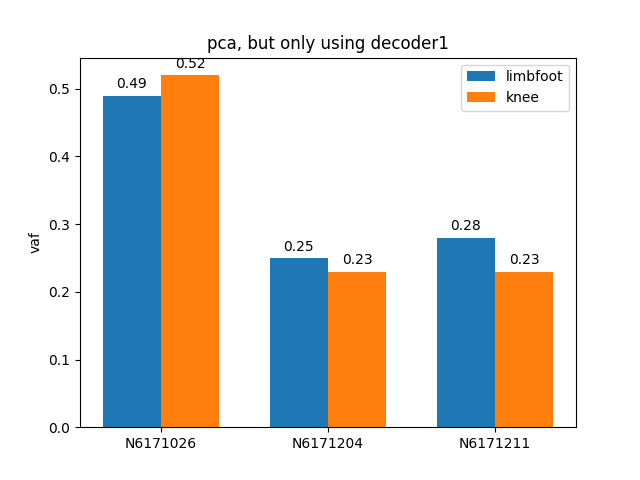

In [65]:
limbfoot_fixed_vaf_scores = []
knee_fixed_vaf_scores = []
for score in fixed_decoder_vaf_list:
    limbfoot_fixed_vaf_scores.append(score[1])
    knee_fixed_vaf_scores.append(score[3])

x = np.arange(len(var_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, limbfoot_fixed_vaf_scores, width, label='limbfoot')
rects2 = ax.bar(x + width/2, knee_fixed_vaf_scores, width, label='knee')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('vaf')
ax.set_title('pca, but only using decoder1')
ax.set_xticks(x)
ax.set_xticklabels(var_names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

In [66]:
cca_x_list = []
cca_x_list_format = []

cca_x_list.append(pca_x_list[0])
cca_x_list_format.append(pca_x_list_format[0])

for i in range(1, len(var_names)):
    temp_cca = cca_dict[var_names[i]]
    temp_x1 = temp_cca.data['cp1']['pca_x']
    temp_x2 = temp_cca.data['cp2']['pca_x']
    temp_x_hat = temp_cca.CCA_cp2(temp_x1, temp_x2)
    cca_x_list.append(temp_x_hat)
    
    temp_x_format, nada = format_data(temp_x_hat, proc_y_list[i])
    cca_x_list_format.append(temp_x_format)  

In [67]:
cca_fixed_decoder_vaf_list = []

for i in range(len(cca_x_list_format)):
    nada, temp_vaf, nada, nada, = decode_kfolds(cca_x_list_format[i], proc_y_list_format[i], preset_h = fixed_decoder)
    cca_fixed_decoder_vaf_list.append(np.round((np.average(temp_vaf, 1)),2))

In [68]:
cca_fixed_decoder_vaf_list

[array([0.44, 0.49, 0.1 , 0.52, 0.2 ]),
 array([0.18, 0.19, 0.08, 0.21, 0.05]),
 array([ 0.25,  0.48,  0.08,  0.46, -0.1 ])]

[Text(0, 3, '0.52'), Text(0, 3, '0.21'), Text(0, 3, '0.46')]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
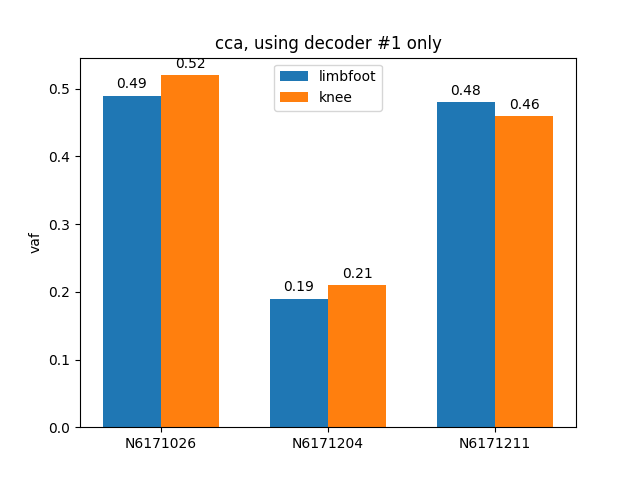

In [69]:
limbfoot_cca_vaf_scores = []
knee_cca_vaf_scores = []
for score in cca_fixed_decoder_vaf_list:
    limbfoot_cca_vaf_scores.append(score[1])
    knee_cca_vaf_scores.append(score[3])

x = np.arange(len(var_names))  # the label locations
width = 0.35  # the width of the barswhat is an integer in python

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, limbfoot_cca_vaf_scores, width, label='limbfoot')
rects2 = ax.bar(x + width/2, knee_cca_vaf_scores, width, label='knee')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('vaf')
ax.set_title('cca, using decoder #1 only')
ax.set_xticks(x)
ax.set_xticklabels(var_names)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
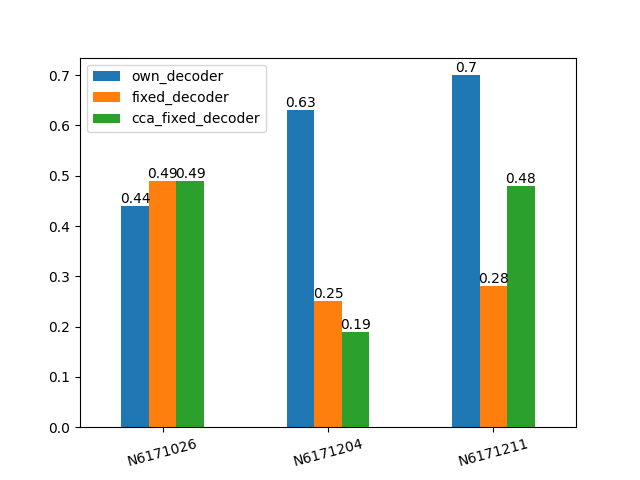

In [70]:
plot_dict = {}
plot_dict['own_decoder'] = limbfoot_pca_vaf_scores
plot_dict['fixed_decoder'] = limbfoot_fixed_vaf_scores
plot_dict['cca_fixed_decoder'] = limbfoot_cca_vaf_scores

index = var_names

df = pd.DataFrame(data=plot_dict, index=index)

  
# plot grouped bar chart
ax = df.plot.bar(rot=15)
for container in ax.containers:
    ax.bar_label(container)



# state space visualization

In [27]:
x_pca_plot = []

for i in range(len(var_names)):
    x_pca_plot.append(cca_dict[var_names[1]].back_to_gait(pca_x_list[i]))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
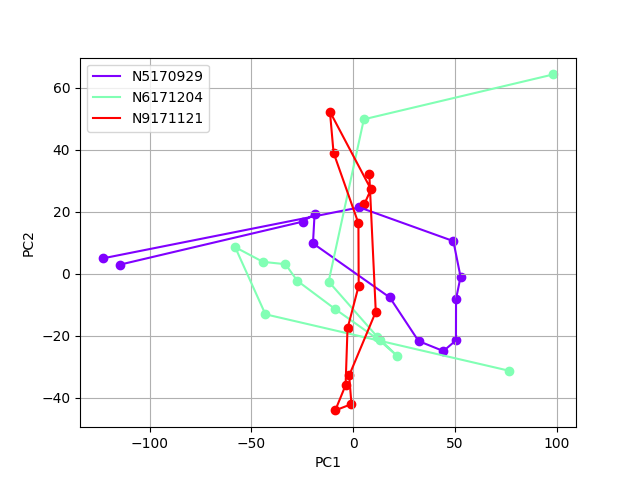

In [28]:
plot_all(x_pca_plot, labels=var_names, subsample=1)

In [29]:
x_cca_plot = []

for i in range(len(var_names)):
    x_cca_plot.append(cca_dict[var_names[1]].back_to_gait(cca_x_list[i]))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
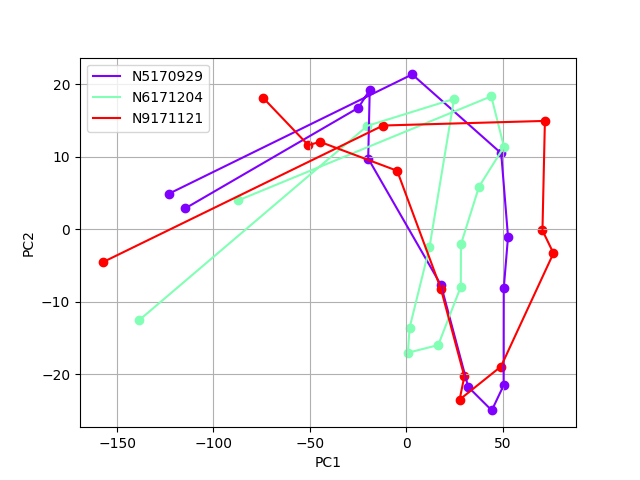

In [30]:
plot_all(x_cca_plot, labels=var_names, subsample=1)

In [25]:
plot_all([x1_cca_plot, x2_cca_plot])

NameError: name 'x1_cca_plot' is not defined

# scrapyard

In [ ]:
x = pca_x_list[0]
y = proc_y_list[0]

In [ ]:
x_ret, y_ret = cca_dict[var_names[1]].back_to_gait(x,y)

In [ ]:
for thing in x_ret:
    x_ret

In [ ]:
avg_samples = cca_dict[var_names[1]].cp1.avg_gait_samples

In [ ]:
test = np.reshape(x, (int(x.shape[0]/avg_samples), avg_samples, x.shape[1]), 'C')

In [ ]:
x.shape[0] / avg_samples

In [ ]:
x.shape[0]/avg_samples